## National Park Services

Understanding the dataset:
* `species_info.csv`, contains data about different species and their conservation status
* `observations.csv`, holds recorded sightings of different species at several national parks for the past 7 days.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading data
species_df = pd.read_csv("species_info.csv")
observations_df = pd.read_csv("observations.csv")

In [4]:
#Inspecting the species dataset
species_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
print( "The shape of species dataframe is:", species_df.shape)
print("The column names of the species dataframe is", list(species_df.columns))

The shape of species dataframe is: (5824, 4)
The column names of the species dataframe is ['category', 'scientific_name', 'common_names', 'conservation_status']


In [6]:
print(species_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


In [7]:
species_df.isnull().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

We can see that the `conservation_status` column has many null values.

In [8]:
print(species_df['category'].unique())
print(species_df['conservation_status'].unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


We can appreciate that the column `category` has 7 categories species: 'Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular Plant'. 

The column `conservation_status` has 4 status types: 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery'.

In [9]:
clean_df = species_df.dropna()
clean_df = clean_df.reset_index(drop=True)
clean_df

,category,scientific_name,common_names,conservation_status
0,Mammal,Canis latrans,Coyote,Species of Concern
1,Mammal,Canis lupus,Gray Wolf,Endangered
2,Mammal,Canis rufus,Red Wolf,Endangered
3,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
4,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern
...,...,...,...,...
186,Vascular Plant,Callitriche marginata,Winged Water-Starwort,Species of Concern
187,Vascular Plant,Camissonia sierrae ssp. alticola,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern
188,Vascular Plant,Epilobium oreganum,"Grants Pass Willowherb, Oregon Fireweed",Species of Concern
189,Vascular Plant,Botrychium ascendens,"Trianglelobe Moonwort, Upswept Moonwort",Species of Concern


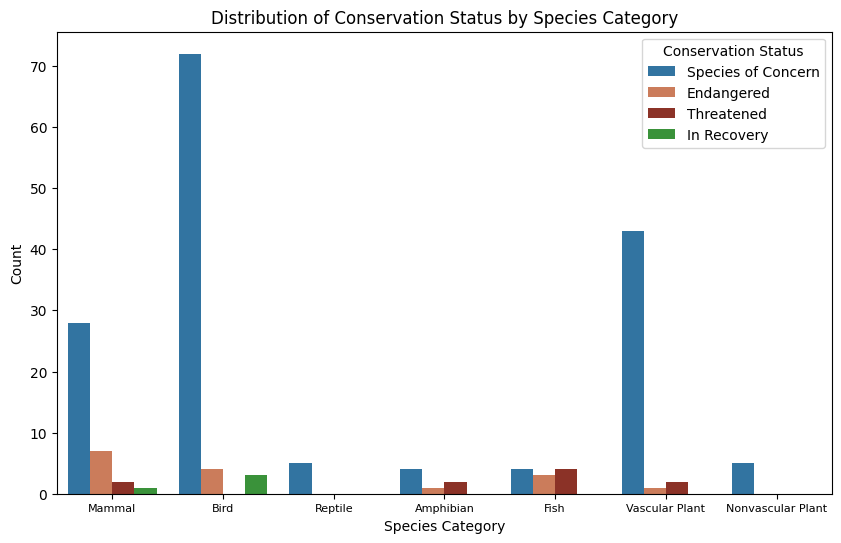

In [10]:
#Define a custom color palette
custom_palette = ['#1f77b4', '#DE7548', '#9C2516', '#2ca02c']
plt.figure(figsize=(10,6))
sns.countplot(data=clean_df, x='category', hue='conservation_status', palette=custom_palette)
plt.title('Distribution of Conservation Status by Species Category')
plt.xlabel('Species Category')
plt.ylabel('Count')
plt.legend(title='Conservation Status')
plt.xticks(rotation=0 , fontsize=8)
plt.show()

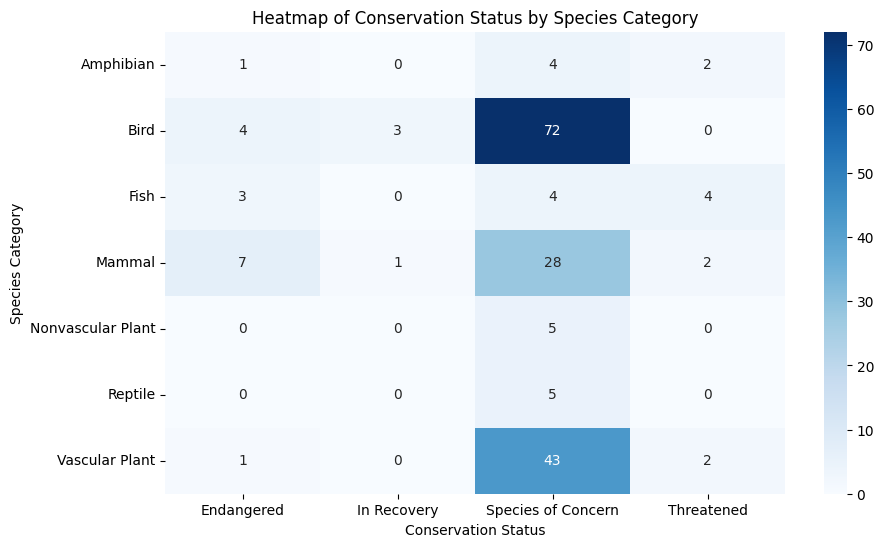

In [11]:
pivot_table = pd.crosstab(clean_df['category'], clean_df['conservation_status'])
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Conservation Status by Species Category')
plt.xlabel('Conservation Status')
plt.ylabel('Species Category')
plt.show()

From the graphs we can conclude that:
* Fishes are the most threatened specie with 4 species, followed by Vascular Plant, Amphibian and Mammal with 2.
* Birds posees more species of Concern with 72 followed by Vascular Plant with 43.
* Mammals are the most endagered specie with 7 followed by Birds and Fish with 4 and 3 respectively.

In [12]:
# Inspecting the observations dataset
observations_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [13]:
print( "The shape of species dataframe is:", observations_df.shape)
print("The column names of the species dataframe is", list(observations_df.columns))

The shape of species dataframe is: (23296, 3)
The column names of the species dataframe is ['scientific_name', 'park_name', 'observations']


In [14]:
# Check for null values
observations_df.isna().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

In [15]:
observations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


We can see that the `observations_df` does not have null values compared with the `species_df`.

In [16]:
print(f"There are {len(observations_df['scientific_name'].unique())} unique scientific names in the dataset")
print(f"There are {len(observations_df['park_name'].unique())} unique park names in the dataset")

There are 5541 unique scientific names in the dataset
There are 4 unique park names in the dataset


We want to know how many species of each category are in each park, for that reason we needto extract the category and the scientific name from `species_df` and map to `observations_df`.

In [17]:
extract_category = dict(zip(species_df['scientific_name'], species_df['category']))
observations_df['category'] = observations_df['scientific_name'].map(extract_category)
observations_df.insert(1, 'category', observations_df.pop('category'))
observations_df

,scientific_name,category,park_name,observations
0,Vicia benghalensis,Vascular Plant,Great Smoky Mountains National Park,68
1,Neovison vison,Mammal,Great Smoky Mountains National Park,77
2,Prunus subcordata,Vascular Plant,Yosemite National Park,138
3,Abutilon theophrasti,Vascular Plant,Bryce National Park,84
4,Githopsis specularioides,Vascular Plant,Great Smoky Mountains National Park,85
...,...,...,...,...
23291,Croton monanthogynus,Vascular Plant,Yosemite National Park,173
23292,Otospermophilus beecheyi,Mammal,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Vascular Plant,Bryce National Park,140
23294,Dicranella rufescens,Nonvascular Plant,Yosemite National Park,171


In [18]:
print( "The shape of species dataframe is:", observations_df.shape)

The shape of species dataframe is: (23296, 4)


In [19]:
observations_df.isnull().sum()

scientific_name    0
category           0
park_name          0
observations       0
dtype: int64

In [27]:
total_observations_df = observations_df[['park_name','category','observations']].groupby(['park_name','category']).sum()
total_observations_df

observations
park_name                           category                       
Bryce National Park                 Amphibian                  7380
                                    Bird                      51647
                                    Fish                      12423
                                    Mammal                    20550
                                    Nonvascular Plant         32992
                                    Reptile                    7950
                                    Vascular Plant           443083
Great Smoky Mountains National Park Amphibian                  5707
                                    Bird                      37728
                                    Fish                       9206
                                    Mammal                    15012
                                    Nonvascular Plant         24857
                                    Reptile                    5691
                                    Vascular Plant           333619
Yellowstone National Park           Amphibian                 19440
                                    Bird                     127251
                                    Fish                      30574
                                    Mammal                    50795
                                    Nonvascular Plant         83021
                                    Reptile                   19554
                                    Vascular Plant          1112927
Yosemite National Park              Amphibian                 11444
                                    Bird                      76207
                                    Fish                      18615
                                    Mammal                    30339
                                    Nonvascular Plant         49783
                                    Reptile                   11483
                                    Vascular Plant           665461

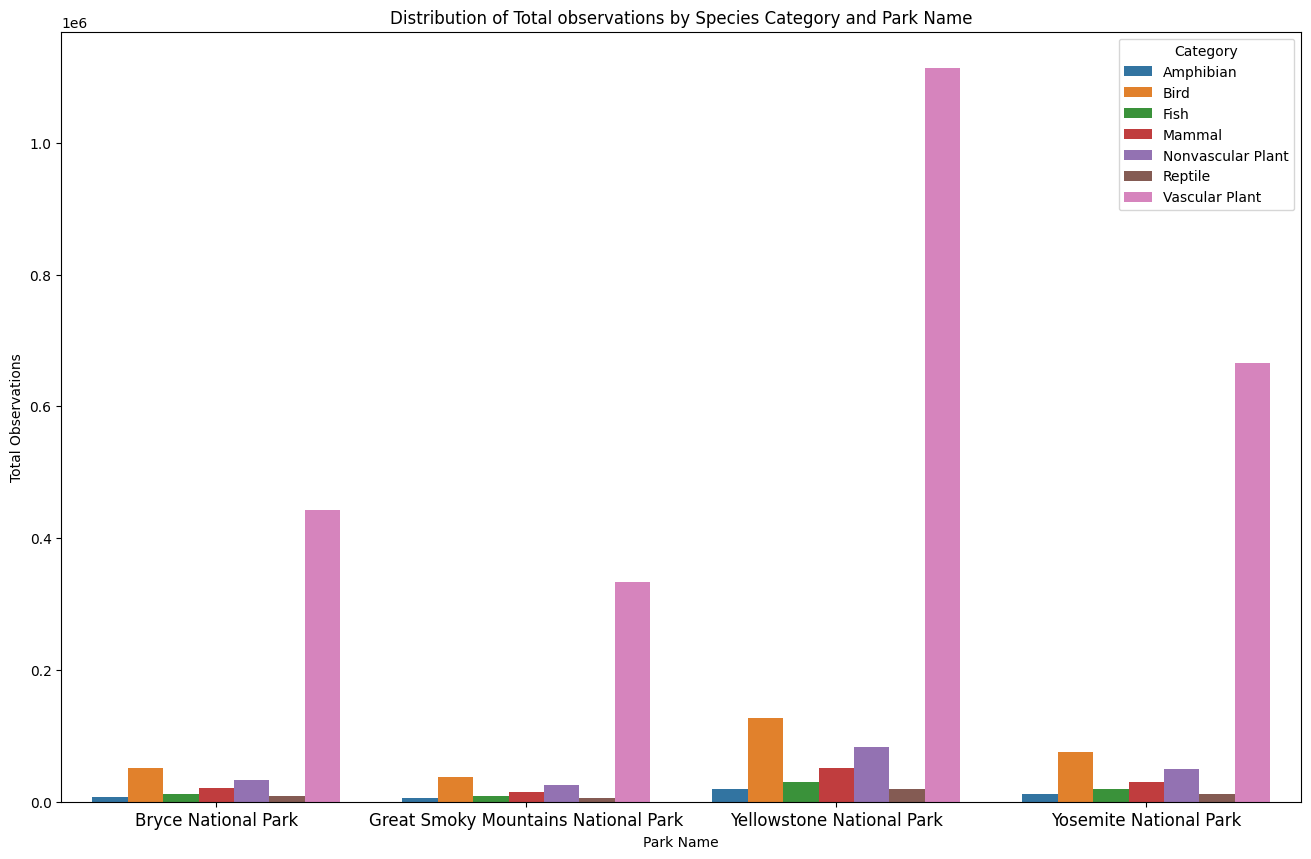

In [29]:
#Define a custom color palette
plt.figure(figsize=(16,10))
new_total_observations_df = observations_df[['park_name','category','observations']].groupby(['park_name','category']).sum().reset_index()
sns.barplot(data=new_total_observations_df, x='park_name', y='observations', hue='category')
plt.title('Distribution of Total observations by Species Category and Park Name')
plt.xlabel('Park Name')
plt.ylabel('Total Observations')
plt.legend(title='Category')
plt.xticks(rotation=0 , fontsize=12)
plt.show()

* We observe that the `Vascular Plant` has more total observations in each National Parks compared the other categories. 
* We see that `Yellowstone National Park` has more category species compared the other parks, this indicate that this park should have more founding from local authorities in order to mantain this species.